# Final Project Notebook

### Amber Greer and Ashlyn Mcconaha

#### University of Arizona - APCV-361 

#### Professor Li Xu


                                 Socioeconomic Factors and Health Outcomes

Research Question: “How do socioeconomic factors such as income, education, and employment affect health outcomes such as premature death rates and overall health quality in counties?”

## Summary

For our project we determined that income, education, and employment status were the variables we wanted to evaluate. 
By evaluating these variables in conjunction with quality-of-life variables such as poor or fair health, poor physical health days, poor mental health days, and low birthweight and/or length of life variables such as premature death (years of potential life lost before age 75) it would paint a robust picture of any correlations in those areas. 
The social economic factors and health outcomes that we have chosen will give us a variety of different results and We will be evaluating across three different areas New York, Texas and California. 

### Methodology/Algorithm

#### Data Source and Collection

Source of Data:
Our analysis is based on data obtained from the County Health Rankings & Roadmaps program, which is a collaboration between the Robert Wood Johnson Foundation and the University of Wisconsin Population Health Institute.

Nature of the Data:
The dataset provides a comprehensive overview of health outcomes and health factors for nearly every county in the United States. It encompasses a wide range of measures that include variables related to:

Health Outcomes: Such as quality of life, length of life, and specific health behaviors.
Health Factors: Covering a broad spectrum, from socioeconomic factors like income, education, and employment, to environmental factors and access to healthcare.
The dataset is particularly valuable for public health research as it encapsulates various determinants of health in a geographically granular manner, allowing for county-level analysis.

Data Accessibility:
The data is publicly accessible and can be downloaded from the County Health Rankings & Roadmaps website. Specifically, the data used in our project can be found in the Rankings Data section of their site:

County Health Rankings & Roadmaps - Rankings Data Documentation

Data Collection Method:
The data was downloaded as an Excel file directly from the above-mentioned webpage. The dataset is provided in a format that is conducive to comprehensive analysis, with each row representing a county and columns representing various health indicators.

Initial Data Inspection:
Upon initial inspection, the dataset includes numerous variables, ranging from demographic data to detailed health metrics. Here is a glimpse of the first few rows of the dataset:

In [2]:
# Code to display the first few rows of the dataset
import pandas as pd

# Load the dataset
data = pd.read_csv('analytic_data2023_0.csv', low_memory=False)

# Display the first five rows of the dataset
data.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature Death raw value,Premature Death numerator,Premature Death denominator,...,% Female raw value,% Female numerator,% Female denominator,% Female CI low,% Female CI high,% Rural raw value,% Rural numerator,% Rural denominator,% Rural CI low,% Rural CI high
0,statecode,countycode,fipscode,state,county,year,county_ranked,v001_rawvalue,v001_numerator,v001_denominator,...,v057_rawvalue,v057_numerator,v057_denominator,v057_cilow,v057_cihigh,v058_rawvalue,v058_numerator,v058_denominator,v058_cilow,v058_cihigh
1,00,000,00000,US,United States,2023,NaN,7281.9355638,4125218,917267406,...,0.5047067187,167509003,331893745,NaN,NaN,0.193,NaN,NaN,NaN,NaN
2,01,000,01000,AL,Alabama,2023,NaN,10350.071456,88086,13668498,...,0.5142542169,2591778,5039877,NaN,NaN,0.409631829,1957932,4779736,NaN,NaN
3,01,001,01001,AL,Autauga County,2023,1,8027.3947267,836,156081,...,0.513782892,30362,59095,NaN,NaN,0.4200216232,22921,54571,NaN,NaN
4,01,003,01003,AL,Baldwin County,2023,1,8118.3582061,3377,614143,...,0.5134771453,122872,239294,NaN,NaN,0.4227909911,77060,182265,NaN,NaN


Next Steps:
The subsequent steps will involve a detailed cleaning and preprocessing of this data to make it suitable for our analysis, which will be discussed in the next section of this notebook.

#### Data Cleaning and Preparation

Handling missing values: strategies and implementation.
Outlier detection and treatment.
Normalization/Standardization (if required).
Include code cells for each step with brief explanations.

In [4]:
import pandas as pd
data = pd.read_csv('ranked_measure_data.csv', low_memory=False)

In [5]:
selected_states = ['New York', 'Texas', 'California']
filtered_data = data[data['State'].isin(selected_states)]

In [6]:
print(filtered_data['State'].unique())
#filtered_data.to_csv('ranked_measure_data_filtered.csv')

['California' 'New York' 'Texas']


-------------------------------------------------------------------------------------------------------------------------------

### Results

**Exploratory Data Analysis (EDA)**
Descriptive statistics (mean, median, variance, etc.).
Data visualization (histograms, box plots, bar charts).
Identification of patterns or initial observations.
Use of markdown cells to explain findings from each plot or statistic.

Our dataset gave us several health factors and outcomes to choose from. Our group wanted to start by observing the replationship between Low Birthweight and Adults Currently Smoking. As displayed by the results we can see that the higher the percentage of adults who smoke resulted in a higher percentage of lower birthweight. This is just one example of a socioeconomic factor and how it can possibly affect health outcomes.

<Figure size 1000x600 with 0 Axes>

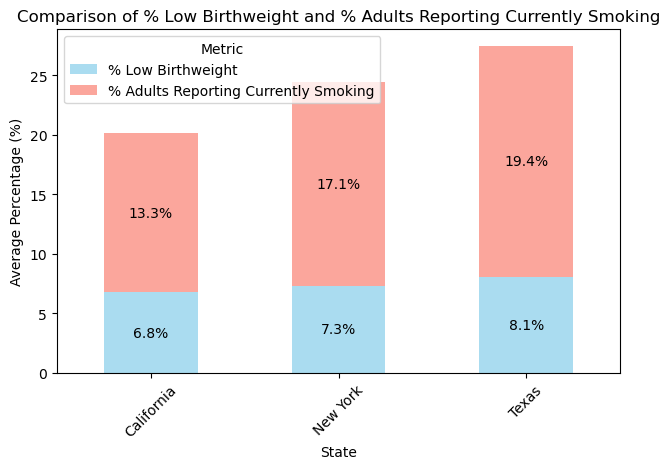

In [13]:
import matplotlib.pyplot as plt

# Plotting the stacked bar graph with percentages displayed as text
plt.figure(figsize=(10, 6))
ax = birth_smoking_state_aggregated_data.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], alpha=0.7)

# Adding text annotations for each bar segment
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0:  # Only display if the height is greater than 0
        ax.text(x + width/2, 
                y + height/2, 
                '{:.1f}%'.format(height), 
                horizontalalignment='center', 
                verticalalignment='center')
        
plt.title('Comparison of % Low Birthweight and % Adults Reporting Currently Smoking')
plt.ylabel('Average Percentage (%)')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()

plt.show()

--------------------------------------------------------------------------------------------------------------------------------

**Correlation Analysis**
Calculation of correlation coefficients.
Visualization (scatter plots, heatmaps).
Interpretation of correlation results.
Discussion of potential relationships between variables.

The following visualizations will assist us in answering our research question on how socioeconomic factors such as income, education, and employment will affect health outcomes. 

Starting with Income, we will determine how this factor has either positively or negatively impacted whether or not a person obtains insurance coverage. 

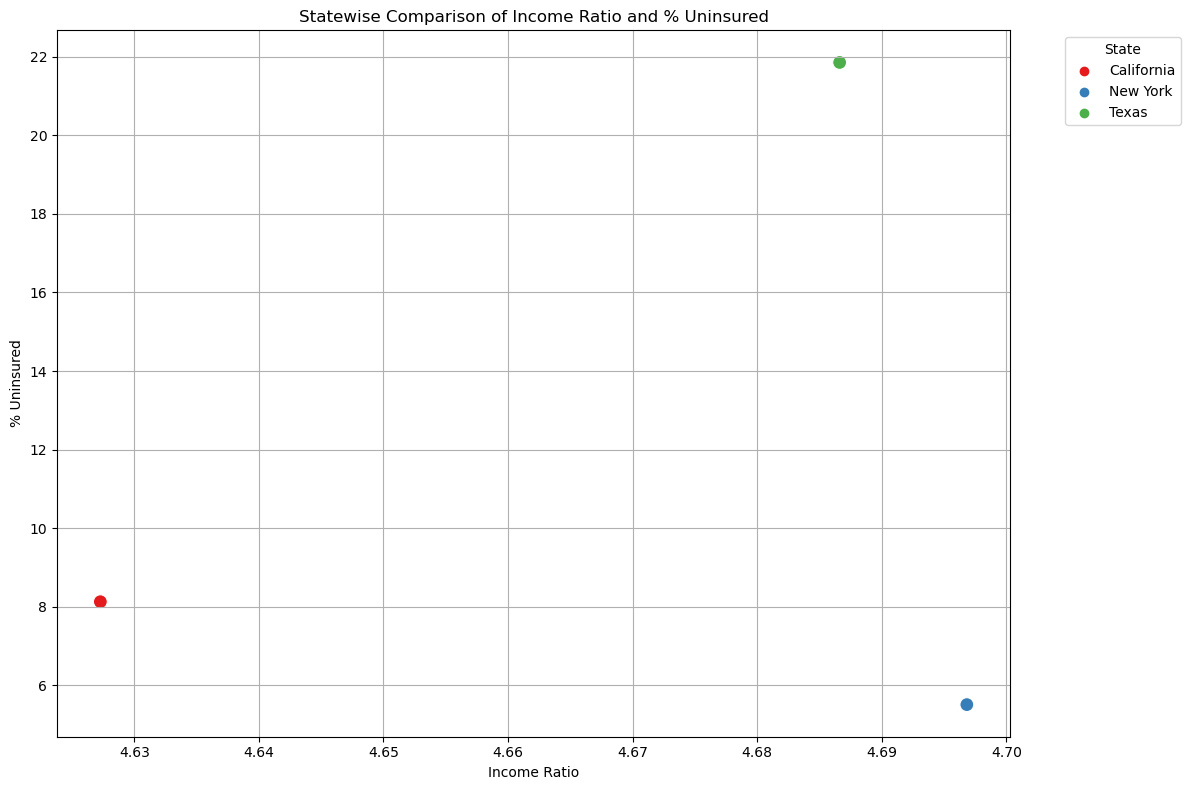

In [14]:
# Import seaborn
import seaborn as sns

# Filtering the dataset for "Income Ratio" and "% Uninsured" for each state
statewise_income_uninsured_data = filtered_data[['State', 'Income Ratio', '% Uninsured']].dropna()

# Aggregating the data at the state level
statewise_aggregated_income_uninsured = statewise_income_uninsured_data.groupby('State').mean()

# Plotting the scatter plot for statewise comparison with more distinguishable colors
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Income Ratio', y='% Uninsured', data=statewise_aggregated_income_uninsured, 
                hue='State', palette='Set1', s=100)
plt.title('Statewise Comparison of Income Ratio and % Uninsured')
plt.xlabel('Income Ratio')
plt.ylabel('% Uninsured')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()

We will then move to Unemployment and School Status

By determining access to insurance coverage we will see how this has affected the health outcomes. Those who do not have access to insurance coverage may not seek medical assistance

**Regression Analysis (Optional)**
If you decide to include regression analysis, describe the model(s).
Implementation of linear or multiple regression models.
Interpretation of regression results.
Visualization of regression lines or coefficients.

**Inferential Statistics/Machine Learning (As Suggested by Professor)**
Brief description of the chosen method(s).
Implementation of the method(s) with code.
Interpretation of results.
Discussion on how these results help answer your research question.

-------------------------------------------------------------------------------------------------------------------------------

### Conclusion

In conclusion, we have determined that 

-------------------------------------------------------------------------------------------------------------------------------

### **References**

“Explore Health Rankings: 2023 Measures.” County Health Rankings & Roadmaps, www.countyhealthrankings.org/explore-health-rankings/county-health-rankings-measures. Accessed 26 Oct. 2023.

“Explore Health Rankings: County Health Rankings Model.” County Health Rankings & Roadmaps, www.countyhealthrankings.org/explore-health-rankings/county-health-rankings-model. Accessed 26 Oct. 2023.

“Explore Health Rankings: Rankings Data & Documentation.” County Health Rankings & Roadmaps, www.countyhealthrankings.org/explore-health-rankings/rankings-data-documentation. Accessed 22 Oct. 2023. 

Ratan SK, Anand T, Ratan J. “Formulation of Research Question - Stepwise Approach.” J Indian Assoc Pediatr Surg. 2019 Jan-Mar; 24(1):15-20. Accessed 24 Oct. 2023
